## 3Commas.io API Integration

In [1]:
from py3cw.request import Py3CW
from coreapi import codecs
import hmac
import hashlib
import requests
import json
from binance.client import Client
import pandas as pd


In [24]:
def get_keys(path):
    
    with open(path) as f:
        
        return json.load(f)

In [25]:
codec = codecs.CoreJSONCodec()

In [26]:
api_key = get_keys('/Users/kyledufrane/.secret/3commas_key.json')
api_secret = get_keys('/Users/kyledufrane/.secret/3commas_secret.json')
secret = api_secret['secret']


url = "https://api.3commas.io/public"
action="/ver1/bots/update_pairs_black_listpairs='USDT_BTC'"
params = codec.encode("/public/api"+action)

signature = hmac.new(codec.encode(secret), params, hashlib.sha256).hexdigest()

### Websocket Data Collection

In [27]:
binance_socket_key = get_keys('/Users/kyledufrane/.secret/binance_socket_key.json')
binance_socket_secret = get_keys('/Users/kyledufrane/.secret/binance_socket_secret.json')

In [38]:
client = Client(binance_socket_key['key'], binance_socket_secret['secret'])

coins = []

exchange_info = client.get_exchange_info()
for name in exchange_info['symbols']:
    if name['symbol'].endswith('USDT'):
        coins.append(name['symbol'].lower())
        
websocket_address = []
intervals = ['1m']

for coin in coins: 
    for interval in intervals:
        websocket_address.append(f'wscat -c wss://stream.binance.com:9443/ws/{coin}@kline_{interval} | tee ~/flatiron_ds/coinbase/data/{coin}_dataset_{interval}.txt')

In [5]:
wscat -c wss://stream.binance.com:9443/ws/btcusdt@kline_1m

SyntaxError: invalid syntax (2581913372.py, line 1)

In [40]:
websocket_address

['wscat -c wss://stream.binance.com:9443/ws/btcusdt@kline_1m | tee ~/flatiron_ds/coinbase/data/btcusdt_dataset_1m.txt',
 'wscat -c wss://stream.binance.com:9443/ws/ethusdt@kline_1m | tee ~/flatiron_ds/coinbase/data/ethusdt_dataset_1m.txt',
 'wscat -c wss://stream.binance.com:9443/ws/bnbusdt@kline_1m | tee ~/flatiron_ds/coinbase/data/bnbusdt_dataset_1m.txt',
 'wscat -c wss://stream.binance.com:9443/ws/bccusdt@kline_1m | tee ~/flatiron_ds/coinbase/data/bccusdt_dataset_1m.txt',
 'wscat -c wss://stream.binance.com:9443/ws/neousdt@kline_1m | tee ~/flatiron_ds/coinbase/data/neousdt_dataset_1m.txt',
 'wscat -c wss://stream.binance.com:9443/ws/ltcusdt@kline_1m | tee ~/flatiron_ds/coinbase/data/ltcusdt_dataset_1m.txt',
 'wscat -c wss://stream.binance.com:9443/ws/qtumusdt@kline_1m | tee ~/flatiron_ds/coinbase/data/qtumusdt_dataset_1m.txt',
 'wscat -c wss://stream.binance.com:9443/ws/adausdt@kline_1m | tee ~/flatiron_ds/coinbase/data/adausdt_dataset_1m.txt',
 'wscat -c wss://stream.binance.com:94

In [39]:
from applescript import tell

for command in websocket_address:

    tell.app('Terminal', 'do script "' + command + '"')

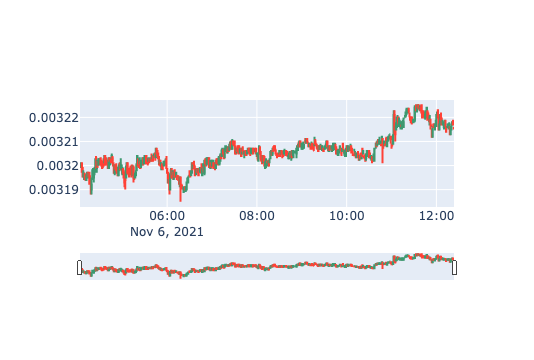

In [10]:
import ccxt
from datetime import datetime
import plotly.graph_objects as go
# collect the candlestick data from Binance
binance = ccxt.binance()
trading_pair = 'LTC/BTC'
candles = binance.fetch_ohlcv(trading_pair, '1m')
dates = []
open_data = []
high_data = []
low_data = []
close_data = []
# format the data to match the charting library
for candle in candles:
    dates.append(datetime.fromtimestamp(candle[0] / 1000.0).strftime('%Y-%m-%d %H:%M:%S.%f'))
    open_data.append(candle[1])
    high_data.append(candle[2])
    low_data.append(candle[3])
    close_data.append(candle[4])
# plot the candlesticks
fig = go.Figure(data=[go.Candlestick(x=dates,
                       open=open_data, high=high_data,
                       low=low_data, close=close_data)])
fig.show()